# NLP and CNN
Convolutional Neural Network (CNN) model specifically designed for processing bigrams (sequences of two words). It leverages the PyTorch framework for efficient deep learning computations.

### Data set

Load the text from "One Hundred Years of Solitude" that we used in our bigrams exercise. It's located in the data folder.

### Important note:

Start with a smaller part of the text. Maybe the first 10 parragraphs, as the number of tokens rapidly increases as we add more text.

Later you can use a bigger corpus.

In [ ]:
import torch
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()

Don't forget to prepare the data by generating the corresponding tokens.

In [ ]:
text = open('./data/cap1.txt', 'r').read().lower()

paragraphs = text.split('\n\n')

first_10_paragraphs = paragraphs[:10]

In [ ]:
# Convert each integer to a string and then join them
result = ''.join(map(str, first_10_paragraphs))

print(result)

muchos años después, frente al pelotón de fusilamiento, el coronel aureliano buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. macondo era entonces una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos prehistóricos. el mundo era tan reciente, que muchas cosas carecían de nombre, y para mencionarlas había que señalarlas con el dedo. todos los años, por el mes de marzo, una familia de gitanos desarrapados plantaba su carpa cerca de la aldea, y con un grande alboroto de pitos y timbales daban a conocer los nuevos inventos. primero llevaron el imán. un gitano corpulento, de barba montaraz y manos de gorrión, que se presentó con el nombre de melquíades, hizo una truculenta demostración pública de lo que él mismo llamaba la octava maravilla de los sabios alquimistas de macedonia. fue de casa en casa arrastrando dos lingotes

In [ ]:
tokensP = tokenizer.tokenize(result)

In [ ]:
tokensP

['muchos',
 'años',
 'después',
 ',',
 'frente',
 'al',
 'pelotón',
 'de',
 'fusilamiento',
 ',',
 'el',
 'coronel',
 'aureliano',
 'buendía',
 'había',
 'de',
 'recordar',
 'aquella',
 'tarde',
 'remota',
 'en',
 'que',
 'su',
 'padre',
 'lo',
 'llevó',
 'a',
 'conocer',
 'el',
 'hielo.',
 'macondo',
 'era',
 'entonces',
 'una',
 'aldea',
 'de',
 'veinte',
 'casas',
 'de',
 'barro',
 'y',
 'cañabrava',
 'construidas',
 'a',
 'la',
 'orilla',
 'de',
 'un',
 'río',
 'de',
 'aguas',
 'diáfanas',
 'que',
 'se',
 'precipitaban',
 'por',
 'un',
 'lecho',
 'de',
 'piedras',
 'pulidas',
 ',',
 'blancas',
 'y',
 'enormes',
 'como',
 'huevos',
 'prehistóricos.',
 'el',
 'mundo',
 'era',
 'tan',
 'reciente',
 ',',
 'que',
 'muchas',
 'cosas',
 'carecían',
 'de',
 'nombre',
 ',',
 'y',
 'para',
 'mencionarlas',
 'había',
 'que',
 'señalarlas',
 'con',
 'el',
 'dedo.',
 'todos',
 'los',
 'años',
 ',',
 'por',
 'el',
 'mes',
 'de',
 'marzo',
 ',',
 'una',
 'familia',
 'de',
 'gitanos',
 'desarrapad

In [ ]:
len(tokensP)

3297

### Let's prepare the data set.

Our neural network needs to have an input X and an output y. Remember that these sets are numerical, so you'd need something to map the tokens into numbers, and viceversa.

In [ ]:
from collections import defaultdict

# Create a mapping of tokens to unique numerical indices
token_to_idx = defaultdict(lambda: len(token_to_idx))  # Assign unique indices as tokens are encountered
idx_to_token = {}

# Populate token-to-index and index-to-token dictionaries
for token in tokensP:
    index = token_to_idx[token]
    idx_to_token[index] = token

# Convert tokens to their respective indices
tokens_indices = [token_to_idx[token] for token in tokensP]

print(f"Token to Index Mapping: {dict(list(token_to_idx.items())[:20])}")  # Show first 20 mappings


Token to Index Mapping: {'muchos': 0, 'años': 1, 'después': 2, ',': 3, 'frente': 4, 'al': 5, 'pelotón': 6, 'de': 7, 'fusilamiento': 8, 'el': 9, 'coronel': 10, 'aureliano': 11, 'buendía': 12, 'había': 13, 'recordar': 14, 'aquella': 15, 'tarde': 16, 'remota': 17, 'en': 18, 'que': 19}


In [ ]:
from collections import defaultdict

# Step 2: Generate Bigrams (w1, w2)
bigrams = [(tokensP[i], tokensP[i + 1]) for i in range(len(tokensP) - 1)]
print("Bigrams:", bigrams)

# Step 3: Create Vocabulary and Map Tokens to Numbers
vocab = defaultdict(lambda: len(vocab))  # Generates IDs for new tokens
X = [vocab[w1] for w1, w2 in bigrams]
y = [vocab[w2] for w1, w2 in bigrams]

print("X (input vector):", X)
print("y (output vector):", y)


Bigrams: [('muchos', 'años'), ('años', 'después'), ('después', ','), (',', 'frente'), ('frente', 'al'), ('al', 'pelotón'), ('pelotón', 'de'), ('de', 'fusilamiento'), ('fusilamiento', ','), (',', 'el'), ('el', 'coronel'), ('coronel', 'aureliano'), ('aureliano', 'buendía'), ('buendía', 'había'), ('había', 'de'), ('de', 'recordar'), ('recordar', 'aquella'), ('aquella', 'tarde'), ('tarde', 'remota'), ('remota', 'en'), ('en', 'que'), ('que', 'su'), ('su', 'padre'), ('padre', 'lo'), ('lo', 'llevó'), ('llevó', 'a'), ('a', 'conocer'), ('conocer', 'el'), ('el', 'hielo.'), ('hielo.', 'macondo'), ('macondo', 'era'), ('era', 'entonces'), ('entonces', 'una'), ('una', 'aldea'), ('aldea', 'de'), ('de', 'veinte'), ('veinte', 'casas'), ('casas', 'de'), ('de', 'barro'), ('barro', 'y'), ('y', 'cañabrava'), ('cañabrava', 'construidas'), ('construidas', 'a'), ('a', 'la'), ('la', 'orilla'), ('orilla', 'de'), ('de', 'un'), ('un', 'río'), ('río', 'de'), ('de', 'aguas'), ('aguas', 'diáfanas'), ('diáfanas', 'qu

In [ ]:
# Don't forget that since we are using torch, our training set vectors should be tensors

In [ ]:
X_tensor = torch.tensor(X, dtype=torch.long)
y_tensor = torch.tensor(y, dtype=torch.long)

print("X Tensor:", X_tensor)
print("y Tensor:", y_tensor)

X Tensor: tensor([   0,    1,    2,  ...,   68, 1273, 1274])
y Tensor: tensor([   1,    2,    3,  ..., 1273, 1274, 1275])


In [ ]:
# Note that our vectors are integers, which can be thought as a categorical variables.
# torch provides the one_hot method, that would generate tensors suitable for our nn
# make sure that the dtype of your tensor is float.

In [ ]:
# Convert X_tensor to one-hot encoded tensor
X_one_hot = torch.nn.functional.one_hot(X_tensor, num_classes=len(vocab)).float()
print("X One-Hot Tensor:", X_one_hot)

# Convert y_tensor to one-hot encoded tensor
y_one_hot = torch.nn.functional.one_hot(y_tensor, num_classes=len(vocab)).float()
print("y One-Hot Tensor:", y_one_hot)

X One-Hot Tensor: tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.]])
y One-Hot Tensor: tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])


###Network design


1D Convolution: The use of a 1D convolutional layer with a kernel size of 1 effectively captures local sequential patterns within the input bigrams.
Max Pooling: The max pooling layer with a kernel size of 1 helps reduce the dimensionality of the output while preserving the most important features.
Fully Connected Layer: The final fully connected layer maps the reduced-dimensional features to the predicted class probabilities.
Log Softmax: The log softmax activation function ensures that the output values represent a probability distribution over the vocabulary.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# CNN Model for Bigrams with adjusted kernel size and padding
class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, num_classes):
        super(CNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)  # Embedding layer
        self.conv1 = nn.Conv1d(in_channels=embedding_dim, out_channels=128, kernel_size=1)  # Kernel size adjusted to 1
        self.pool = nn.MaxPool1d(1)  # Max pooling with kernel size 1
        self.fc1 = nn.Linear(128, num_classes)  # Fully connected layer for classification

    def forward(self, x):
        x = self.embedding(x).permute(0, 2, 1)  # Convert to [batch, channels, sequence_length]
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flatten the output
        x = self.fc1(x)
        return F.log_softmax(x, dim=1)

# Initialize the model
embedding_dim = 50
vocab_size = len(vocab)
num_classes = len(vocab)  # Output should predict the next token in the vocabulary
model = CNN(vocab_size, embedding_dim, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
import matplotlib.pyplot as plt

# Training the CNN model with accuracy tracking
epochs = 100
batch_size = 32
losses = []
accuracies = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_tensor)

    # Calculate loss
    loss = criterion(outputs, y_tensor)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Store the loss
    losses.append(loss.item())

    # Calculate accuracy
    _, predicted = torch.max(outputs, 1)  # Get the predicted token
    correct = (predicted == y_tensor).sum().item()  # Check how many are correct
    accuracy = correct / len(y_tensor)  # Calculate accuracy as a percentage
    accuracies.append(accuracy)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy * 100:.2f}%')

# Training complete


Epoch [10/100], Loss: 6.8228, Accuracy: 2.67%
Epoch [20/100], Loss: 6.3515, Accuracy: 4.58%
Epoch [30/100], Loss: 5.8173, Accuracy: 5.13%
Epoch [40/100], Loss: 5.2988, Accuracy: 5.92%
Epoch [50/100], Loss: 4.8330, Accuracy: 8.01%
Epoch [60/100], Loss: 4.4191, Accuracy: 10.35%
Epoch [70/100], Loss: 4.0631, Accuracy: 13.20%
Epoch [80/100], Loss: 3.7653, Accuracy: 14.93%
Epoch [90/100], Loss: 3.5145, Accuracy: 17.05%
Epoch [100/100], Loss: 3.3004, Accuracy: 23.09%


### Analysis

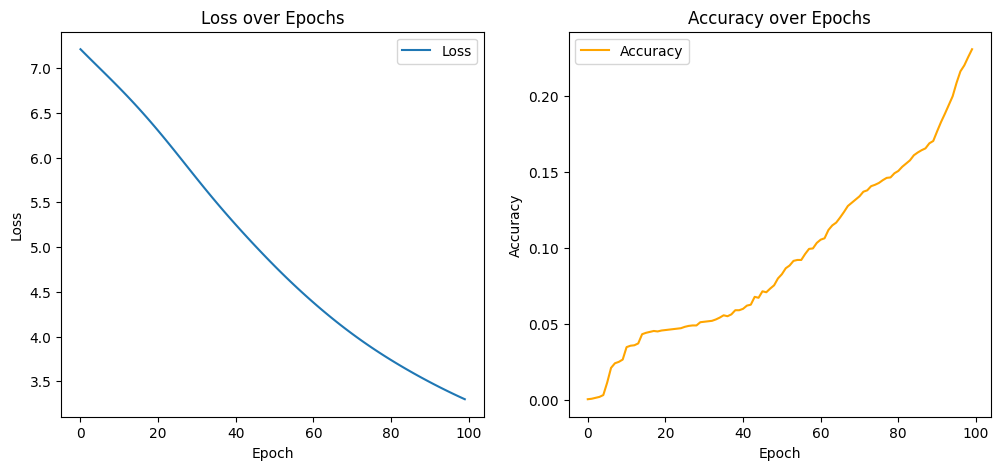

In [ ]:
# Plotting loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.show()


Generate some sentences al calculate the

In [ ]:
import torch
import torch.nn.functional as F

def generate_sentence(seed_word, model, vocab, idx_to_token, max_length=20):
    model.eval()  # Set model to evaluation mode

    current_word = seed_word
    sentence = [current_word]
    likelihoods = []  # To store the negative log-likelihood of each word

    for _ in range(max_length - 1):
        if current_word in vocab:
            # Get the index of the current word
            current_idx = torch.tensor([vocab[current_word]], dtype=torch.long)  # Ensure LongTensor

            # Convert the index to the correct shape for the model
            # Shape for CNN should be [batch_size, seq_length] which means [1, 1]
            current_tensor = current_idx.unsqueeze(0)  # Shape: [1, 1]

            # Pass the word index to the model
            with torch.no_grad():
                output = model(current_tensor)

            # Get the probabilities for the next word
            probs = F.softmax(output, dim=1)

            # Sample the next word based on the probabilities
            next_word_idx = torch.multinomial(probs[0], num_samples=1).item()  # Use probs[0] to access the tensor
            next_word = idx_to_token[next_word_idx]

            # Calculate negative log-likelihood for the predicted word
            word_prob = probs[0, next_word_idx].item()
            nll = -torch.log(torch.tensor(word_prob + 1e-9)).item()  # Add small value to avoid log(0)
            likelihoods.append(nll)

            # Add the predicted word to the sentence
            sentence.append(next_word)
            current_word = next_word
        else:
            break  # Stop if the word is not in the vocabulary

    return sentence, likelihoods

# Function to generate and display multiple sentences
def generate_and_show_sentences(seed_words, model, vocab, idx_to_token):
    for seed_word in seed_words:
        try:
            sentence, likelihoods = generate_sentence(seed_word, model, vocab, idx_to_token)
            sentence_str = ' '.join(sentence)
            total_nll = sum(likelihoods)

            print(f"Generated sentence: '{sentence_str}'")
            print(f"Negative log-likelihood for the sentence: {total_nll:.4f}")
            print('-' * 50)
        except Exception as e:
            print(f"Error generating sentence for seed word '{seed_word}': {e}")

# Seed words for sentence generation
seed_words = ['aldea', 'numerosos', 'testimonios']

# Generate sentences and show results
generate_and_show_sentences(seed_words, model, vocab, idx_to_token)


Generated sentence: 'aldea vida partida de la muerte del mundo. según para empedrar cuando a todas y reverberante un peso estaba se'
Negative log-likelihood for the sentence: 85.4177
--------------------------------------------------
Generated sentence: 'numerosos envió descubrimiento buendía que se sacó formaba , y trabar al público los sabios que de cólera y aun'
Negative log-likelihood for the sentence: 83.0321
--------------------------------------------------
Generated sentence: 'testimonios sobre el fondo era josé arcadio buendía josé arcadio buendía de perecer del monje llevaba orientado lograron las tenazas'
Negative log-likelihood for the sentence: 71.3920
--------------------------------------------------


The sentence generated from the seed word 'testimonios' has the lowest NLL **(71.3920**), suggesting that this sentence is the most likely or coherent according to the model's training.
The sentences from 'aldea' and 'numerosos' have higher NLL values (85.4177 and 83.0321, respectively), indicating these sentences are less probable or coherent.